<a href="https://colab.research.google.com/github/PierluigiRiti2/Android/blob/master/QuantumSVMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Readme

This notebook is used to collect in one clean place all the code I have developed until now for the processing of an image with Quantum Machine Learning.
The goal is to used QML, Quantum Machine Learning, to correctly classify Deepfake.


In [2]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 4.1 MB/s 
     |████████████████████████████████| 18.0 MB 254 kB/s 
     |████████████████████████████████| 240 kB 56.8 MB/s 
     |████████████████████████████████| 198 kB 62.9 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 112 kB 52.3 MB/s 
     |████████████████████████████████| 1.6 MB 42.5 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 943 kB 46.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 4.0 MB 34.4 MB/s 
     |████████████████████████████████| 112 kB 55.5 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=1e4215f489

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from math import sqrt, pi

import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt

In [4]:
# Function used to generate an histogram from a grey image
def generate_histogram_image(image_path):
  # open the image as a gray
  image = skimage.io.imread(fname=image_path, as_gray=True)

  # Generate the Histogram for the grey image
  histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1)) 

  return histogram, bin_edges

# Convert the raw pixel values to probability amplitudes
def amplitude_encode(hist_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(hist_data**2)))

    # Create normalized image
    image_norm = []
    for arr in hist_data:
      #for ele in arr:
      image_norm.append(arr / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

In [5]:
# Histogram of the original image
histogram_original, bin_edges_original = generate_histogram_image("/content/drive/MyDrive/dataset/images/original/fadg0-original.jpg")

amplitude_original = amplitude_encode(histogram_original)

# histogram of the fake image
histogram_fake, bin_edges_fake = generate_histogram_image("/content/drive/MyDrive/dataset/images/fake/fadg0-sa1.jpg")

amplitude_fake = amplitude_encode(histogram_fake)

In [ ]:
#sim = AerSimulator(method='statevector')
#qc_original = QuantumCircuit(total_qb)
#qc_original.initialize(amplitude_original, range(1, total_qb))
#qc_original.save_statevector()   # Tell simulator to save statevector
#qobj_original = assemble(qc_original)     # Create a Qobj from the circuit for the simulator to run
#result_original = sim.run(qobj_original).result() # Do the simulation and return the result
#out_state_original = result_original.get_statevector()
#counts_original = result_original.get_counts() #Count the value for the histogram

#qc_original.measure_all()
#qc_original.draw() # Draw the circuit

# Create the circuit for vertical scan
#qc_fake = QuantumCircuit(total_qb)
#qc_fake.initialize(amplitude_fake, range(1, total_qb))
#qc_fake.save_statevector()   # Tell simulator to save statevector
#qobj_fake = assemble(qc_fake)     # Create a Qobj from the circuit for the simulator to run
#result_fake = sim.run(qobj_fake).result() # Do the simulation and return the result
#out_state_fake = result_fake.get_statevector()
#counts_fake = result_fake.get_counts() # Count the value for the histogram

#qc_fake.measure_all()
#qc_fake.draw()

# Combine both circuits into a single list
#circ_list = [qc_original, qc_fake]

In [13]:
def create_circuit(qbit, amplitude):
  simulator = AerSimulator(method='statevector')

  qc = QuantumCircuit(qbit)
  qc.initialize(amplitude, range(1, qbit))
  qc.save_statevector()   # Tell simulator to save statevector
  qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
  result = simulator.run(qobj).result() # Do the simulation and return the result
  out_state = result.get_statevector()
  counts = result.get_counts() #Count the value for the histogram

  #measure_= qc.measure_all()
  #draw_= qc.draw()

  return counts, out_state#, measure_, draw_

In [23]:
data_qb = 8
anc_qb = 1
total_qb = data_qb + anc_qb
# call the functionality to collect the information about the circuit etc..
#counts, out_state, measure, draw = create_circuit(total_qb, amplitude_original)
counts, out_state = create_circuit(total_qb, amplitude_original)

197
512


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  # Remove the CWD from sys.path while we load stuff.


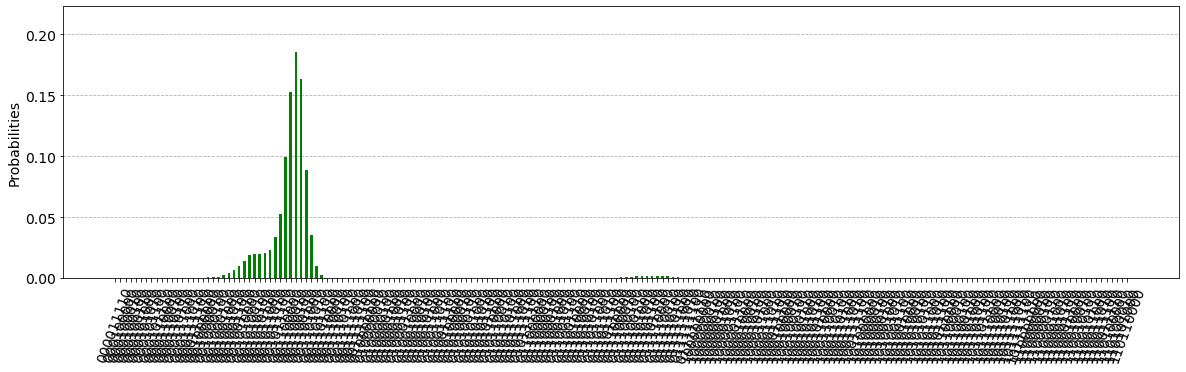

In [21]:
plot_histogram(counts, 
               color='green',
               figsize=(20,5),  
               bar_labels=False)